In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split #instead of cross_validation
import pandas as pd

In [3]:
X = np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])

In [4]:
X

array([[ 1. ,  2. ],
       [ 1.5,  1.8],
       [ 5. ,  8. ],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

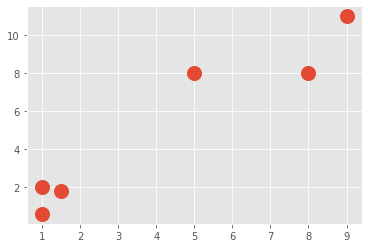

In [5]:
plt.scatter(X[:,0],X[:,1], s= 100, linewidth=5)

In [6]:
clf = KMeans(n_clusters=2)

In [7]:
clf.fit(X)

KMeans(n_clusters=2)

In [8]:
centroids = clf.cluster_centers_

In [9]:
labels = clf.labels_

In [10]:
colors = 10 * ["g.","r.","c.","b.","k."]

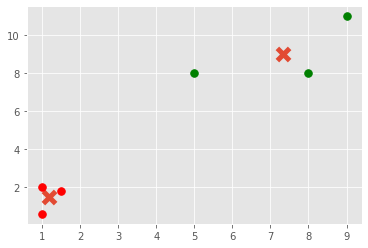

In [11]:
for i in range(len(X)):
    plt.plot(X[i][0],X[i][1], colors[labels[i]],markersize = 15)
plt.scatter(centroids[:,0], centroids[:,1], marker='x',s=150, linewidths=5)

In [12]:
labels

array([1, 1, 0, 0, 1, 0])

In [14]:
df = pd.read_excel("https://raw.githubusercontent.com/ajaykuma/Datasets/master/titanic.xls")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [15]:
df.drop(['body','name'],1,inplace=True)

In [16]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


In [17]:
df.fillna(0, inplace =True)

In [18]:
df.head()


,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"


In [19]:
columns = df.columns.values

In [24]:
df.dtypes

pclass         int64
survived       int64
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
home.dest     object
dtype: object

In [28]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x +=1
            df[column] = list(map(convert_to_int, df[column]))   
    return df


In [33]:
df = handle_non_numerical_data(df)

In [34]:
X = np.array(df.drop(['survived'],1))

In [35]:
X

array([[  1.    ,   0.    ,  29.    , ...,   3.    ,   1.    , 330.    ],
       [  1.    ,   1.    ,   0.9167, ...,   3.    ,  10.    , 300.    ],
       [  1.    ,   0.    ,   2.    , ...,   3.    ,   0.    , 300.    ],
       ...,
       [  3.    ,   1.    ,  26.5   , ...,   1.    ,   0.    ,   0.    ],
       [  3.    ,   1.    ,  27.    , ...,   1.    ,   0.    ,   0.    ],
       [  3.    ,   1.    ,  29.    , ...,   3.    ,   0.    ,   0.    ]])

In [36]:
y = np.array(df['survived'])

In [37]:
y

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
clf = KMeans(n_clusters=2)

In [39]:
clf.fit(X)

KMeans(n_clusters=2)

In [40]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[1]:
        correct += 1

In [41]:
print(correct/len(X))

0.4881588999236058


In [42]:
len(X)

1309

In [43]:
from sklearn.datasets import make_blobs

In [44]:
n_samples = 300

In [45]:
random_state = 20

In [46]:
X,y = make_blobs(n_samples=n_samples,n_features=5,random_state=None)

In [47]:
X

array([[ 9.84220059, -5.79600191,  8.85545663,  3.68417471,  7.08057467],
       [ 9.66155815, -5.9506147 ,  8.79743586,  4.3777834 ,  5.23725372],
       [-9.28109861, -0.33759577,  4.44901013, -2.07716013, -4.44462277],
       ...,
       [-8.86181506,  1.77110672,  4.70774212,  1.37638945, -2.43991725],
       [ 9.03999634, -4.9742363 , -7.48108672,  9.47276015, -3.24122831],
       [ 9.34083249, -5.2556577 ,  6.99536006,  4.93545389,  6.36724505]])

In [48]:
y

array([1, 1, 2, 2, 1, 0, 2, 0, 2, 2, 2, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 1,
       1, 1, 2, 2, 0, 0, 0, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2,
       1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 2, 2, 2, 2,
       0, 0, 0, 2, 1, 0, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 0, 1, 0, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 1, 1, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2,
       2, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 2, 2, 1,
       0, 2, 1, 2, 0, 0, 1, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 2, 2, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 0,
       1, 2, 0, 1, 1, 1, 2, 0, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 0, 2,
       0, 2, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 2, 0,
       2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 0, 1])

In [49]:
predict_y = KMeans(n_clusters=3,random_state=random_state).fit_predict(X)

In [50]:
predict_y

array([0, 0, 1, 1, 0, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 0,
       0, 0, 1, 1, 2, 2, 2, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1,
       0, 2, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 1, 1, 1, 1,
       2, 2, 2, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1,
       1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 1, 0, 1,
       0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 0, 1, 2, 2, 0, 2, 2, 1, 1, 2, 0, 2, 0, 0, 0, 1, 1, 2, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 2, 0, 2, 2,
       0, 1, 2, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 0, 2, 1,
       2, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2,
       1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 2, 0])

In [51]:
N,y = make_blobs(n_samples=2,n_features=5,random_state=None)

In [52]:
N

array([[-4.90963037,  6.21464331,  2.96171038, -4.11720007,  2.89284877],
       [ 2.60392114, -5.44798078,  3.80381906, -2.35025328, -4.01357215]])

In [53]:
y


array([1, 0])

In [54]:
predict_n = KMeans(n_clusters=2,random_state=random_state).fit_predict(N)

In [55]:
print(predict_n)

[1 0]
